# Performing Sales Demand Forecasts using Prophet
I will be doing a baseline model that demonstrated the usefulness of using prophet

- Sales forcasting provides sales reps a data decision approach in terms of planning. When a model is constructed on a solid foundation it minimizes the guesswork and most importantly helps allocate resources effectively. 

- Growth opportunities can be identified to help financial teams understand cash flow to calculate profits for a given period. 

- Understand the health of a company. 

In [ ]:
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import io, base64, os, json, re, glob
import datetime
from datetime import timedelta 
import pandas as pd 
#import pydata_google_auth
import numpy as np

from fbprophet import Prophet 
import statsmodels.api as sm 

In [5]:

df_raw = pd.read_csv('train.csv', low_memory=False,
                     parse_dates=['date'], index_col=['date'])
df_raw.head()


,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [6]:
df_raw = df_raw.sort_values('date', ascending=True)
df_raw.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-01,7,12,26
2013-01-01,7,46,27
2013-01-01,8,12,54
2013-01-01,9,12,35


## Store 1: All sales

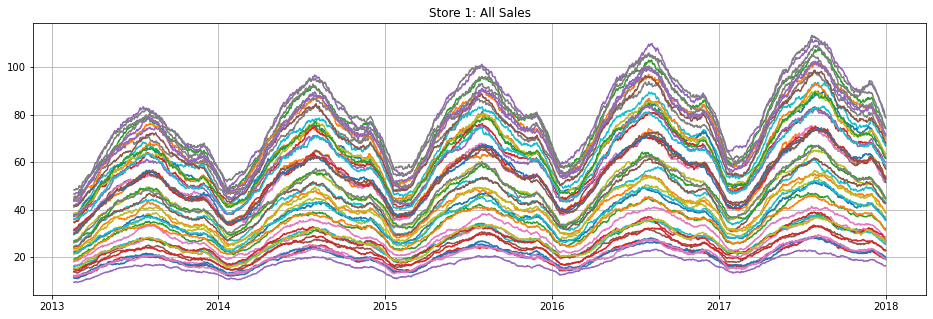

In [9]:
plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Store 1: All Sales')
for item in set(df_raw[df_raw['store'] == 1]['item']):
    plt.plot(df_raw[(df_raw['store'] == 1) & (df_raw['item'] == item)]['sales'].rolling(window=50).mean())

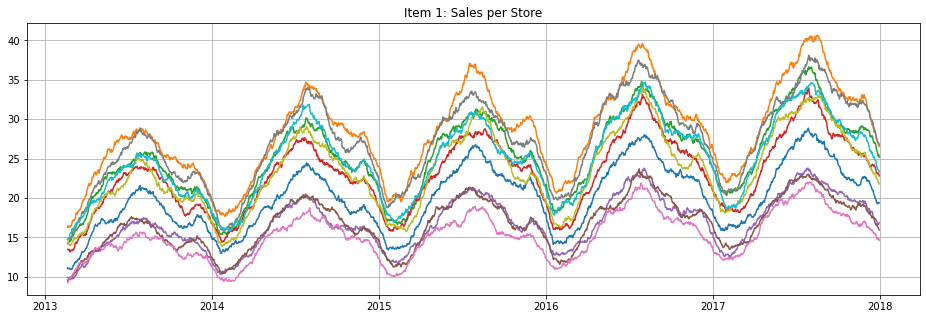

In [11]:
plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Item 1: Sales per Store')
for store in set(df_raw[df_raw['item'] == 1]['store']):
    plt.plot(df_raw[(df_raw['item'] == 1) & (df_raw['store'] == store)]['sales'].rolling(window=50).mean())

In [13]:
train_dataset = df_raw[(df_raw['item'] == 1) & df_raw['store'] == 1]
train_dataset.reset_index(level=0, inplace=True)
train_dataset = train_dataset[['date', 'sales']]
train_dataset.columns = ['ds', 'y']

train_dataset = train_dataset.sample(5000)

In [14]:
# Instastiate 
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

future = prophet_basic.make_future_dataframe(periods=365)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-03
4,2013-01-03
...,...
5360,2018-12-27
5361,2018-12-28
5362,2018-12-29
5363,2018-12-30


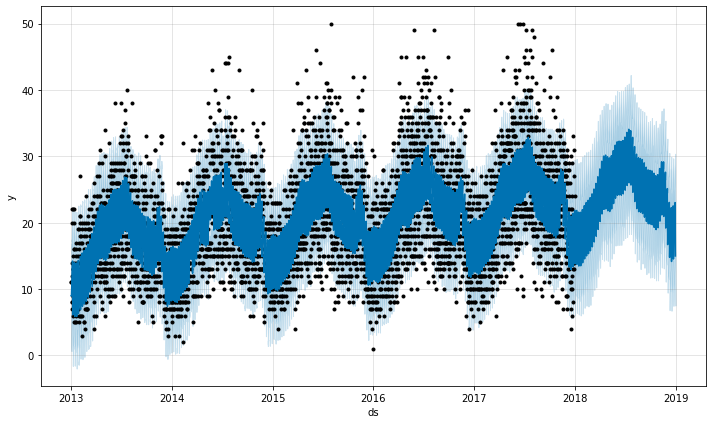

In [16]:
forecast=prophet_basic.predict(future)

# Plotting the perdicted data
fig1 = prophet_basic.plot(forecast)

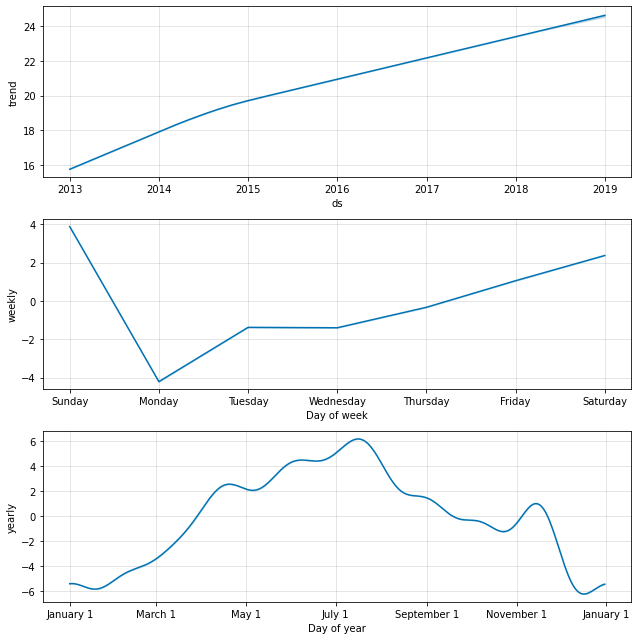

In [17]:
fig1 = prophet_basic.plot_components(forecast)

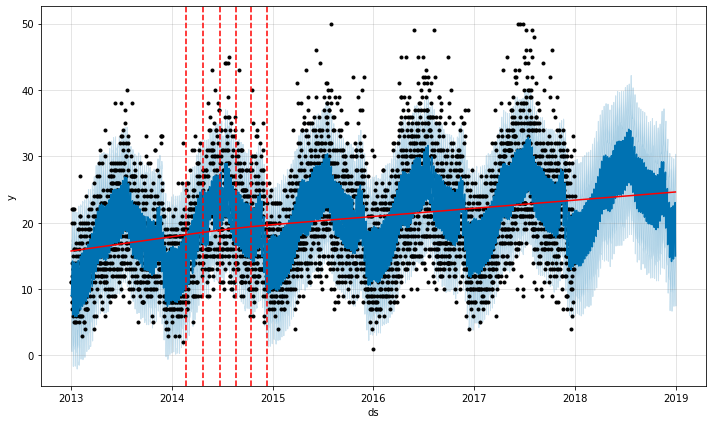

In [18]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

## Vitamin D: Time Series Analysis

In [24]:
# Google Trends: Vitamin D
# The percentage of viewership 
df_vitamins = pd.read_csv('Vitamin_d.csv')
df_vitamins['ds'] = pd.to_datetime(df_vitamins['ds'])
df_vitamins = df_vitamins.sort_values('ds', ascending=True)
print(df_vitamins.info())
df_vitamins.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      260 non-null    datetime64[ns]
 1   y       260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.1 KB
None


,ds,y
0,2016-05-08,39
1,2016-05-15,37
2,2016-05-22,39
3,2016-05-29,35
4,2016-06-05,34


In [25]:
train_dataset = df_vitamins.copy()
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)
future= prophet_basic.make_future_dataframe(periods=365)
future.tail(100)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
525,2022-01-16
526,2022-01-17
527,2022-01-18
528,2022-01-19
529,2022-01-20
...,...
620,2022-04-21
621,2022-04-22
622,2022-04-23
623,2022-04-24


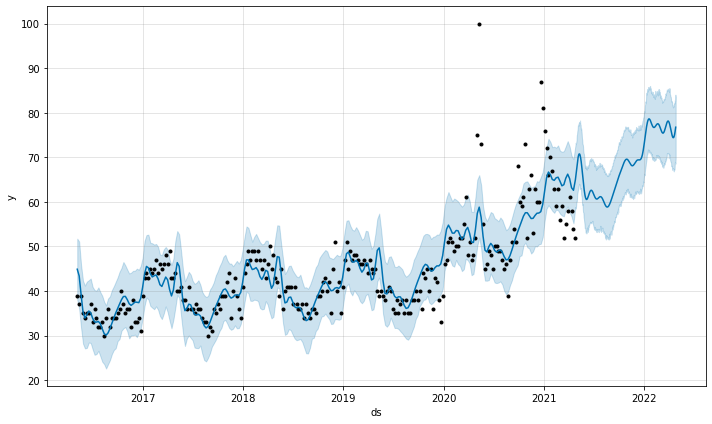

In [26]:
forecast=prophet_basic.predict(future)

# Plotting the perdicted data
fig_vitamin_d = prophet_basic.plot(forecast)

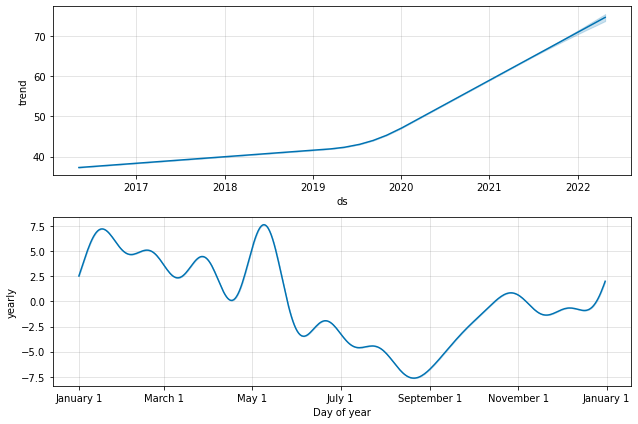

In [28]:
fig_vitamin_d = prophet_basic.plot_components(forecast)

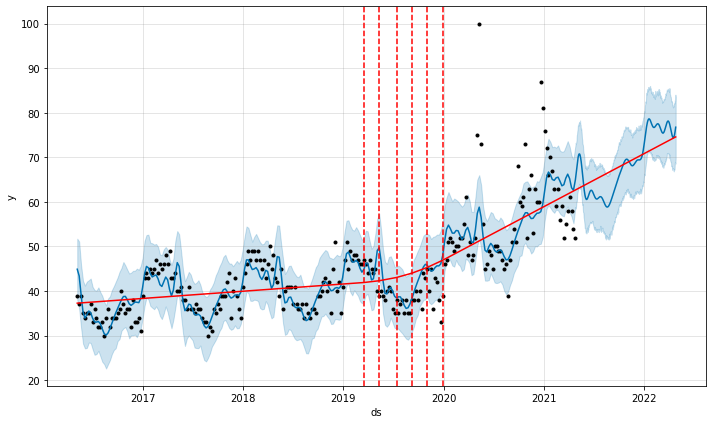

In [27]:
from fbprophet.plot import add_changepoints_to_plot
fig_vd = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig_vd.gca(), prophet_basic, forecast)

## NY Rangers: Time Series Analysis

In [29]:
# Google Trends: NY_Rangers
# The percentage of viewership 
df_NY_Rangers = pd.read_csv('NY_Rangers.csv')
df_NY_Rangers['ds'] = pd.to_datetime(df_NY_Rangers['ds'])
df_NY_Rangers = df_NY_Rangers.sort_values('ds', ascending=True)
print(df_NY_Rangers.info())
df_NY_Rangers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      262 non-null    datetime64[ns]
 1   y       262 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.1 KB
None


,ds,y
0,2016-05-08,6
1,2016-05-15,5
2,2016-05-22,5
3,2016-05-29,5
4,2016-06-05,6


In [30]:
train_dataset = df_NY_Rangers.copy()
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)
future= prophet_basic.make_future_dataframe(periods=365)
future.tail(100)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
527,2022-01-16
528,2022-01-17
529,2022-01-18
530,2022-01-19
531,2022-01-20
...,...
622,2022-04-21
623,2022-04-22
624,2022-04-23
625,2022-04-24


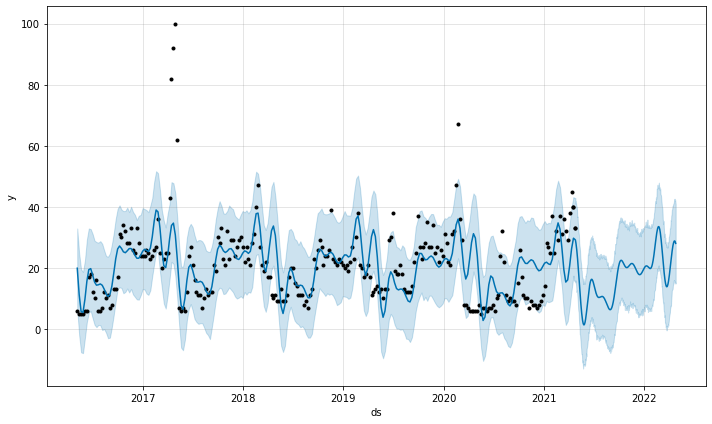

In [31]:
forecast=prophet_basic.predict(future)

# Plotting the perdicted data
fig_NY_Rangers = prophet_basic.plot(forecast)

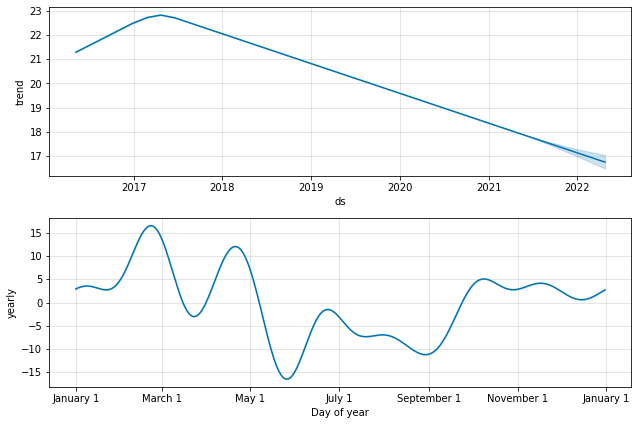

In [32]:
fig_NY_Rangers_Trends = prophet_basic.plot_components(forecast)

## Schedule of the hockey league 
This year the Rangers didn't make the playoffs so you saw the drop in demand after july. Once the season was over new trades and preparation of the new season causes demand to raise. 

## FLUSSO: Time Series Analysis
By Pass Adapter

In [33]:
# Google Trends: FLUSSO
# The percentage of viewership 
df_FLUSSO = pd.read_csv('FLUSSO.csv')
df_FLUSSO['ds'] = pd.to_datetime(df_FLUSSO['ds'])
df_FLUSSO = df_FLUSSO.sort_values('ds', ascending=True)
print(df_FLUSSO.info())
df_FLUSSO.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      260 non-null    datetime64[ns]
 1   y       260 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.1 KB
None


,ds,y
0,2016-05-08,0
1,2016-05-15,0
2,2016-05-22,0
3,2016-05-29,0
4,2016-06-05,0


In [34]:
train_dataset = df_FLUSSO.copy()
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)
future= prophet_basic.make_future_dataframe(periods=365)
future.tail(100)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
525,2022-01-16
526,2022-01-17
527,2022-01-18
528,2022-01-19
529,2022-01-20
...,...
620,2022-04-21
621,2022-04-22
622,2022-04-23
623,2022-04-24


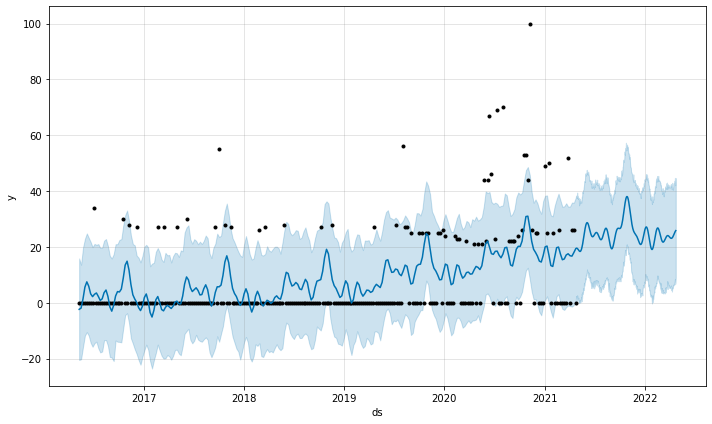

In [35]:
forecast=prophet_basic.predict(future)

# Plotting the perdicted data
fig_FLUSSO = prophet_basic.plot(forecast)

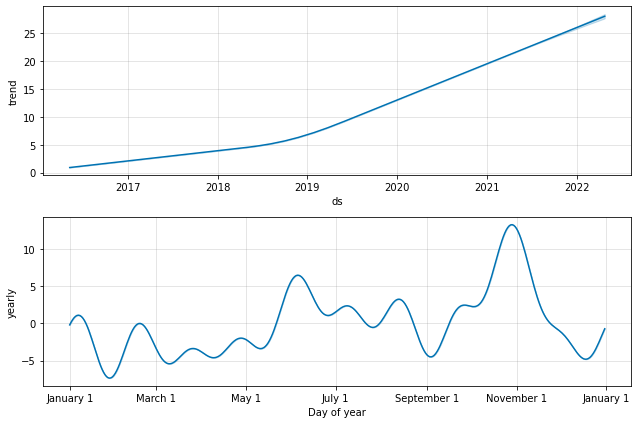

In [36]:
fig_FLUSSO = prophet_basic.plot_components(forecast)

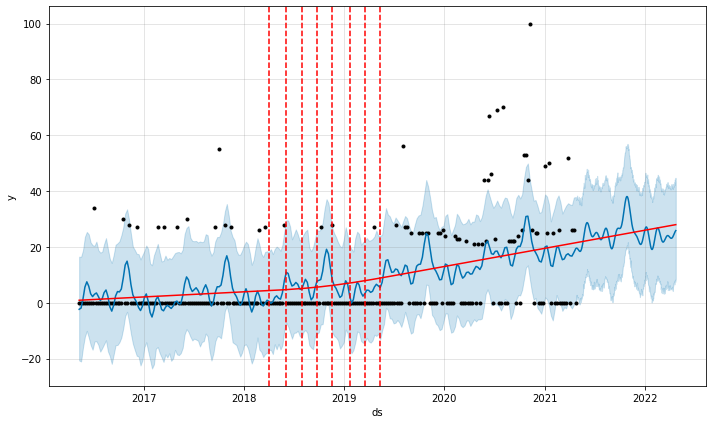

In [39]:
from fbprophet.plot import add_changepoints_to_plot
fig_FLUSSO = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig_FLUSSO.gca(), prophet_basic, forecast)

### FLUSSO
- Looking at this google trend of the FLUSSO by pass, the prophet model predicts about a 5% growth in demand. 
- Another insight found in this analysis is the highest demand occured around the the start of October and the end of November.